# Time-mean near-bottom stratification

This notebook is converted from plt_bot_N.py, which visulizes the time-mean bottom 500m-averaged buoyancy frequency (i.e., stratification) and gives the latitude range of the domain. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 

In [2]:
mat = scipy.io.loadmat('/short/v45/lxy581/mom6/diag/n2_SO_10_b5_v33_y50_170914.mat')

In [3]:
xh  = mat['xh']
yh  = mat['yh']
lat = mat['lat']
n2s = mat['n2s']

In [4]:
print np.min(lat[0,:])

-54.4117345999


In [5]:
print np.max(lat[0,:])

-33.8566794612


In [6]:
ns0 = np.sqrt(n2s)
ns0 = np.real(ns0)
ns  = np.log10(ns0)
ns  = np.transpose(ns)

/projects/access/apps/pythonlib/ipython/3.1.0/ipython-3.1.0-py2.7.egg/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


In [8]:
%matplotlib inline

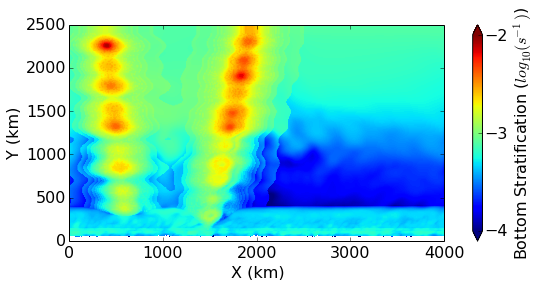

In [9]:
plt.figure(1,figsize=(8,5))

n_level = np.arange(-4,-2+0.01,0.001) 
n_ticks = np.arange(-4,-2+1,1) 

X,Y=np.meshgrid(xh,yh)

pc = plt.contourf(X,Y,ns,cmap=plt.cm.jet,levels=n_level,extend='both')
cb = plt.colorbar(pc,ticks=n_ticks)
plt.gca().set_yticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_yticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_xticks(np.arange(-2000,2000 + 1000,1000))
plt.gca().set_xticklabels(['0','1000','2000','3000','4000'])
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.set_label('Bottom Stratification ($log_{10}(s^{-1})$)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('X (km)',fontsize=16)
plt.ylabel('Y (km)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# plt.savefig('/short/v45/lxy581/mom6/diag/v33_y50_b5_N_170907.png',dpi=600)

plt.show()